In [ ]:
# importing warning package to ignore the warnings
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# Importing the required library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import metrics


## Importing and Understanding Data

In [ ]:
# Reading and inspecting the dataframe

h_data = pd.read_csv("train.csv")
h_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
h_data.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [ ]:
h_data.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [ ]:
#inspecting the dataframe
# checking the number of rows and columns
h_data.shape

(1460, 81)

In [ ]:
h_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
#Checking the Null values

h_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [ ]:
# Checking if there are columns with one unique value since it won't affect our analysis
h_data.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

In [ ]:
#Checking the value count

h_data.PoolQC.value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [ ]:
h_data.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [ ]:
h_data.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [ ]:
h_data.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64


### Data Preparation (Encoding Categorical Variables, Handling Null Values)
###Imputing Null Values

In [ ]:
## Checking the percentage of Null values

df_missing=pd.DataFrame((round(100*(h_data.isnull().sum()/len(h_data.index)), 2)), columns=['missing'])
df_missing.sort_values(by=['missing'], ascending=False).head(20)

,missing
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
FireplaceQu,47.26
LotFrontage,17.74
GarageYrBlt,5.55
GarageCond,5.55
GarageType,5.55
GarageFinish,5.55


In [ ]:
## Treating the NaN Values
h_data['PoolQC'] = h_data['PoolQC'].fillna('No_Pool')
h_data['MiscFeature'] = h_data['MiscFeature'].fillna('None')
h_data['Alley'] = h_data['Alley'].fillna('No_Alley_Access')
h_data['Fence'] = h_data['Fence'].fillna('No_Fence')
h_data['FireplaceQu'] = h_data['FireplaceQu'].fillna('No_Fireplace')
h_data['GarageYrBlt'] = h_data['GarageYrBlt'].fillna(0)
h_data['MasVnrType'] = h_data['MasVnrType'].fillna('None')
h_data['MasVnrArea'] = h_data['MasVnrArea'].fillna(0)
h_data['MasVnrArea'] = h_data['MasVnrArea'].fillna(0)
h_data['Electrical'] = h_data['Electrical'].fillna("Other")

In [ ]:
## Dropping the LotFontgage columns as it have more Null values
h_data.drop("LotFrontage",axis = 1, inplace=True)

In [ ]:
# Imputing the Nan Values with 'No Basementh_data'
for col in ('BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual','BsmtCond'):
    h_data[col] = h_data[col].fillna('No_Basement')

In [ ]:
#Imputing the NaN values with 'no garage' 
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    h_data[col] = h_data[col].fillna('No_Garage')

In [ ]:
h_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [ ]:
h_data['GarageYrBlt'] = h_data['GarageYrBlt'].astype(int)

## Performing EDA
### Univariate and Bivariate Analysis

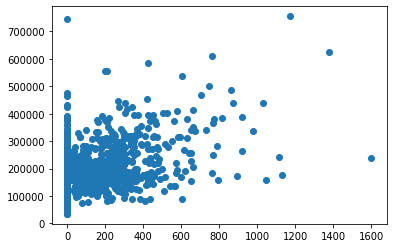

In [ ]:
plt.scatter(h_data.MasVnrArea,h_data.SalePrice)

Text(0.5, 1.0, 'Veneer Area')

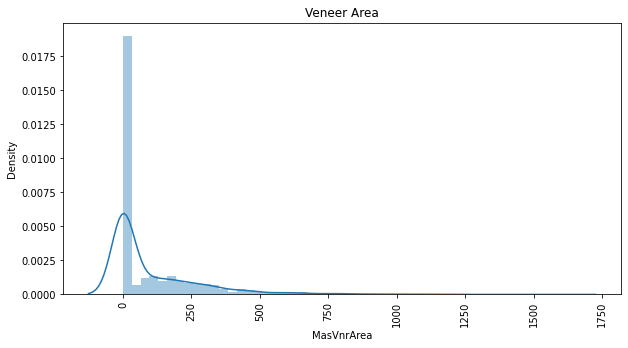

In [ ]:
# plotting a distplot 
plt.figure(figsize = (10,5))
sns.distplot(h_data['MasVnrArea']).tick_params(axis='x', rotation = 90)
plt.title('Veneer Area')

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

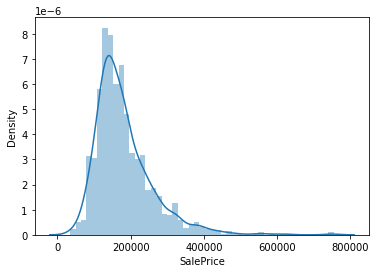

In [ ]:
sns.distplot(h_data['SalePrice'])

In [ ]:
print("Skewness: %f" % h_data['SalePrice'].skew())
print("Kurtosis: %f" % h_data['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


Text(0.5, 1.0, 'Basement Condition')

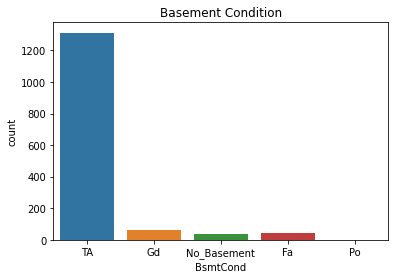

In [ ]:
## Checking Basement counts
sns.countplot(x='BsmtCond', data= h_data)
plt.title('Basement Condition')

Text(0.5, 1.0, 'Overall Condition')

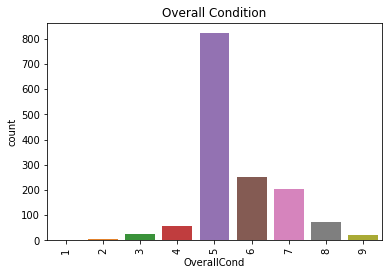

In [ ]:
sns.countplot(x='OverallCond', data= h_data).tick_params(axis='x', rotation = 90)
plt.title('Overall Condition')

Text(0.5, 1.0, 'Gr LivArea vs SalePrice')

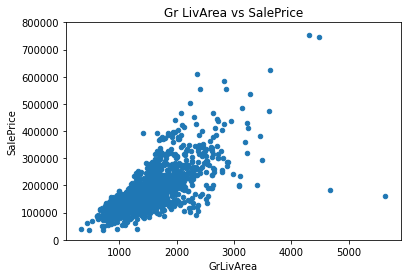

In [ ]:
data = pd.concat([h_data['SalePrice'], h_data['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000));
plt.title('Gr LivArea vs SalePrice')

<AxesSubplot:xlabel='SalePrice'>

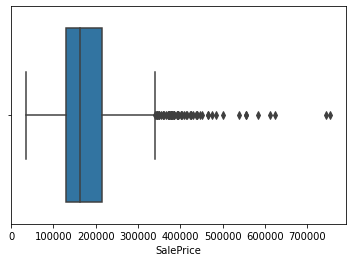

In [ ]:
# Checking the outliers 

sns.boxplot(x='SalePrice', data=h_data)

Text(0.5, 1.0, 'Overall Quality vs SalePrice')

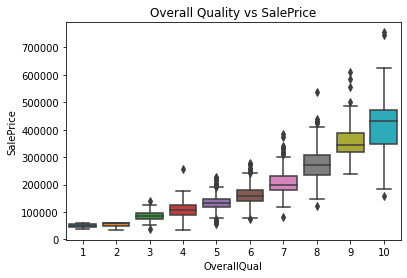

In [ ]:
sns.boxplot(x='OverallQual', y='SalePrice', data=h_data)
plt.title("Overall Quality vs SalePrice")

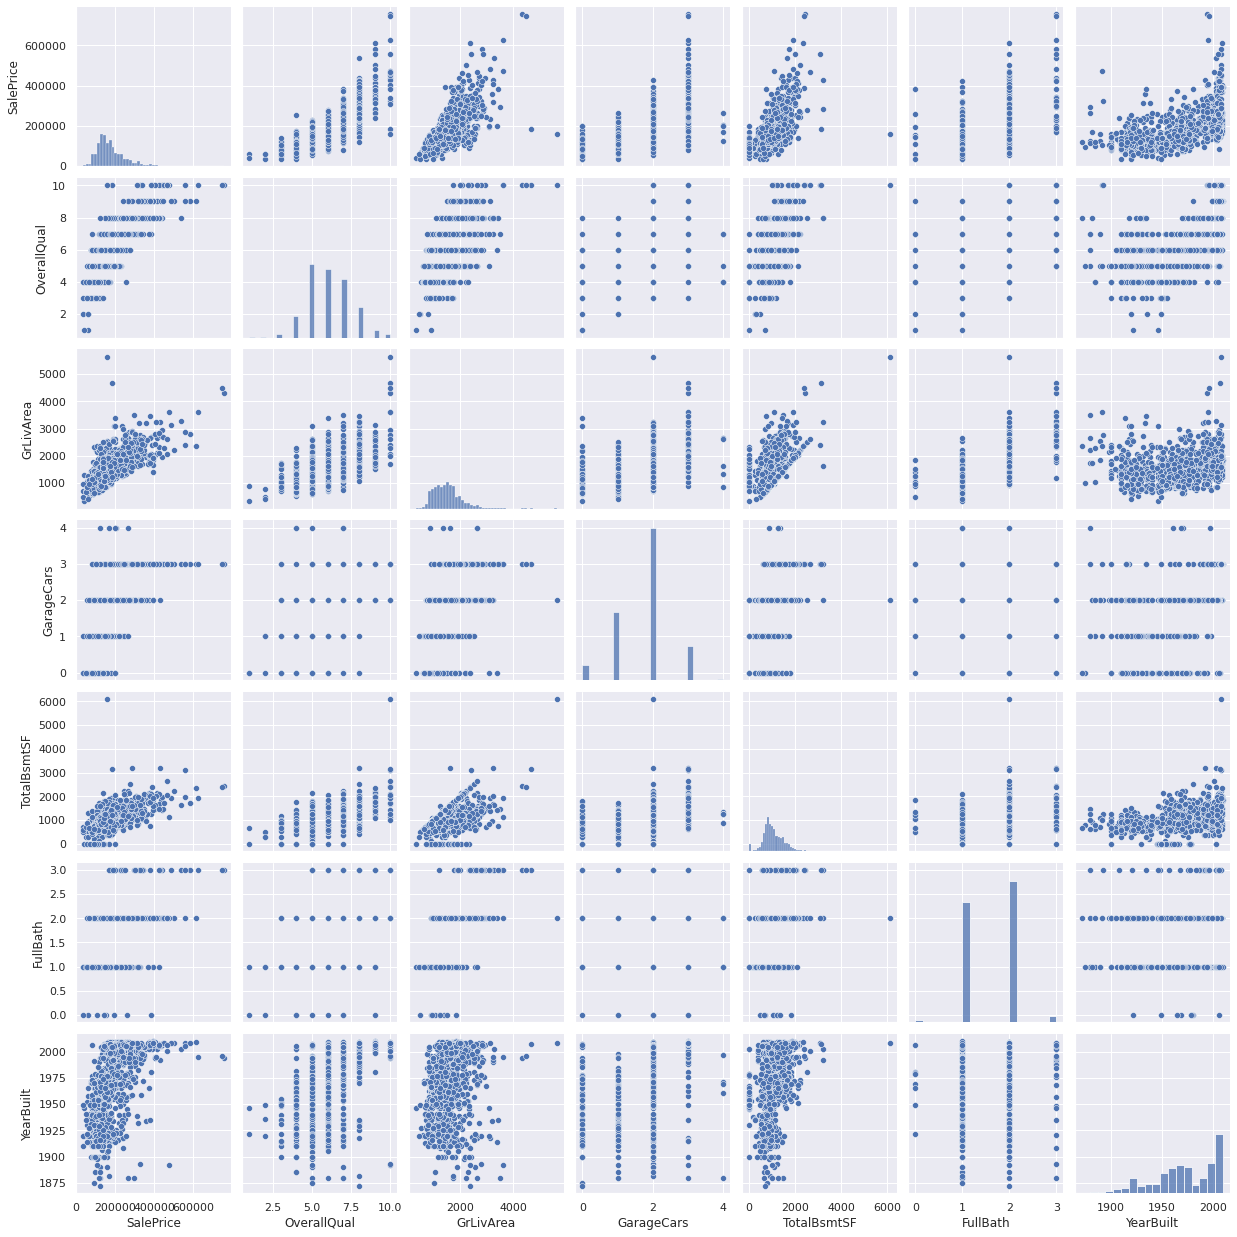

In [ ]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(h_data[cols], size = 2.5)
plt.show();

Text(0.5, 1.0, 'Checking Correlation matrix ')

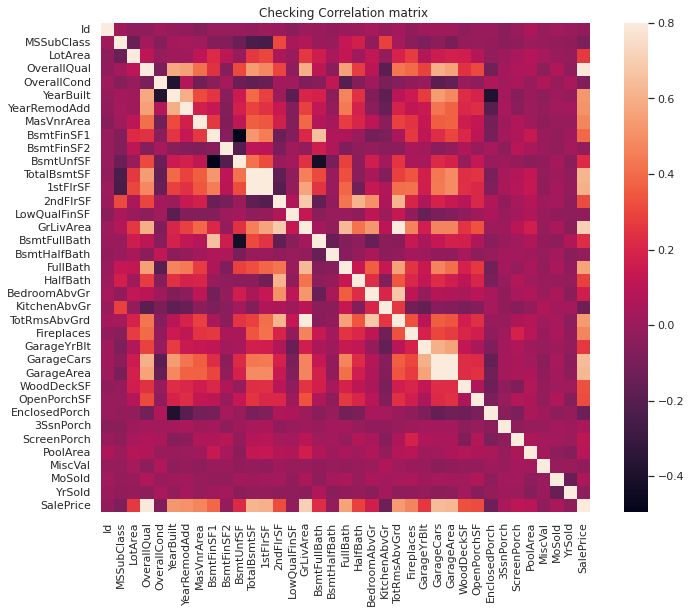

In [ ]:
#checjing the correlation matrix
corrmat = h_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.title("Checking Correlation matrix ")

## Data Preperation

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

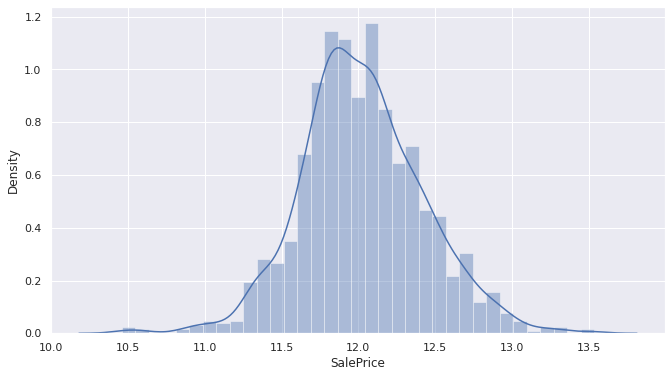

In [ ]:
plt.figure(figsize=(11,6))
sns.distplot(np.log(h_data["SalePrice"]))

### Deriving Variables

In [ ]:
numeric_data = h_data.select_dtypes(include = ['float64','int64'])
numeric_data.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [ ]:
#Converting a Binary varible into numeric datatypes
# mapping it to 0 and 1
h_data['Street'] = h_data['Street'].apply(lambda x: 1 if x == 'Pave' else 0 )

h_data['CentralAir'] = h_data['CentralAir'].apply(lambda x : 1 if x == 'Y' else 0)
                                                  
h_data['PavedDrive'] = h_data['PavedDrive'].apply(lambda x : 1 if x == 'Y' else 0)

In [ ]:
cat_values = h_data.select_dtypes(include=['object'])
cat_values.head()

,MSZoning,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,No_Alley_Access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,No_Fireplace,Attchd,RFn,TA,TA,No_Pool,No_Fence,None,WD,Normal
1,RL,No_Alley_Access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Attchd,RFn,TA,TA,No_Pool,No_Fence,None,WD,Normal
2,RL,No_Alley_Access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,Attchd,RFn,TA,TA,No_Pool,No_Fence,None,WD,Normal
3,RL,No_Alley_Access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Detchd,Unf,TA,TA,No_Pool,No_Fence,None,WD,Abnorml
4,RL,No_Alley_Access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,TA,Attchd,RFn,TA,TA,No_Pool,No_Fence,None,WD,Normal


In [ ]:
# convert into dummies
data_dummies = pd.get_dummies(cat_values, drop_first=True)
data_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_No_Alley_Access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
## Droping the 'Id' column 
df = h_data.drop(['Id'],axis=1)

In [ ]:
# Droping the original categorical column
df = df.drop(list(cat_values.columns), axis=1)

In [ ]:
# Adding the dummy categorical column to original dataset
df = pd.concat([df,data_dummies], axis=1)

In [ ]:
df.shape

(1460, 259)

#Train Test Split

In [ ]:
df_train,df_test = train_test_split(df, train_size=0.7,test_size = 0.3, random_state=100)

In [ ]:
y_train = np.log(df_train.SalePrice)
X_train = df_train.drop("SalePrice",1)

y_test= np.log(df_test.SalePrice)
X_test = df_test.drop("SalePrice",1)

In [ ]:
num_values=X_train.select_dtypes(include=['int64','float64']).columns
num_values

Index(['MSSubClass', 'LotArea', 'Street', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [ ]:
##   Scaling the data
scaler = StandardScaler()
X_train[num_values] = scaler.fit_transform(X_train[num_values])
X_test[num_values] = scaler.transform(X_test[num_values])

## Model Building

In [ ]:
## Building a Regression model.
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
# Calculating the RFE
rfe = RFE(estimator=reg,n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

In [ ]:
col=X_train.columns[rfe.support_]
col

Index(['OverallQual', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Neighborhood_BrDale', 'Condition2_PosN',
       'RoofStyle_Shed', 'RoofMatl_Membran', 'RoofMatl_Tar&Grv',
       'RoofMatl_WdShngl', 'Exterior1st_BrkComm', 'Exterior2nd_AsphShn',
       'Heating_GasA', 'Heating_GasW', 'Heating_Wall', 'Electrical_FuseP',
       'Functional_Sev', 'GarageQual_Po', 'PoolQC_Gd'],
      dtype='object')

In [ ]:
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
X_train_new=X_train[col]
X_train_new = sm.add_constant(X_train_new)

#create first model
lr=sm.OLS(y_train,X_train_new)

#fit the model
lr_model=lr.fit()

#Print the summary 
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     145.8
Date:                Sat, 04 Mar 2023   Prob (F-statistic):          1.75e-279
Time:                        15:24:11   Log-Likelihood:                 192.60
No. Observations:                1021   AIC:                            -343.2
Df Residuals:                    1000   BIC:                            -239.7
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  11.0452      0.117     94.243      0.000      10.815      11.275
OverallQual             0.3039      0.007     44.976      0.000       0.291       0.317
MSZoning_FV             0.4551      0.084      5.413      0.000       0.290       0.620
MSZoning_RH             0.4147      0.095      4.343      0.000       0.227       0.602
MSZoning_RL             0.5246      0.078      6.728      0.000       0.372       0.678
MSZoning_RM             0.3101      0.079      3.925      0.000       0.155       0.465
Neighborhood_BrDale    -0.2650      0.061     -4.348      0.000      -0.385      -0.145
Condition2_PosN        -0.7910      0.203     -3.888      0.000      -1.190      -0.392
RoofStyle_Shed          0.2628      0.143      1.833      0.067      -0.018       0.544
RoofMatl_Membran        0.1286      0.203      0.635      0.526      -0.269       0.526
RoofMatl_Tar&Grv        0.2612      0.096      2.723      0.007       0.073       0.449
RoofMatl_WdShngl        0.2599      0.102      2.551      0.011       0.060       0.460
Exterior1st_BrkComm    -0.6444      0.153     -4.202      0.000      -0.945      -0.343
Exterior2nd_AsphShn    -0.3186      0.203     -1.572      0.116      -0.716       0.079
Heating_GasA            0.4988      0.088      5.699      0.000       0.327       0.671
Heating_GasW            0.6143      0.105      5.875      0.000       0.409       0.820
Heating_Wall            0.4229      0.134      3.154      0.002       0.160       0.686
Electrical_FuseP       -0.3177      0.130     -2.447      0.015      -0.572      -0.063
Functional_Sev         -0.5424      0.224     -2.422      0.016      -0.982      -0.103
GarageQual_Po           0.2278      0.165      1.378      0.168      -0.097       0.552
PoolQC_Gd              -0.9348      0.203     -4.595      0.000      -1.334      -0.536
==============================================================================
Omnibus:                        8.150   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.017   Jarque-Bera (JB):               10.586
Skew:                           0.079   Prob(JB):                      0.00503
Kurtosis:                       3.473   Cond. No.                         59.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,342.12
4,MSZoning_RL,25.51
5,MSZoning_RM,19.90
2,MSZoning_FV,7.42
14,Heating_GasA,4.20
15,Heating_GasW,3.42
3,MSZoning_RH,2.85
16,Heating_Wall,1.75
10,RoofMatl_Tar&Grv,1.34
19,GarageQual_Po,1.33


In [ ]:
#Dropping column "RoofMatl_Membran" due to high p value of 0.8
X_train_new=X_train_new.drop("RoofMatl_Membran", axis=1)
#create first model
lr=sm.OLS(y_train,X_train_new)

#fit the model
lr_model=lr.fit()

#Print the summary 
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     153.5
Date:                Sat, 04 Mar 2023   Prob (F-statistic):          1.71e-280
Time:                        15:24:49   Log-Likelihood:                 192.39
No. Observations:                1021   AIC:                            -344.8
Df Residuals:                    1001   BIC:                            -246.2
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  11.0452      0.117     94.272      0.000      10.815      11.275
OverallQual             0.3040      0.007     45.010      0.000       0.291       0.317
MSZoning_FV             0.4549      0.084      5.412      0.000       0.290       0.620
MSZoning_RH             0.4146      0.095      4.343      0.000       0.227       0.602
MSZoning_RL             0.5246      0.078      6.730      0.000       0.372       0.678
MSZoning_RM             0.3100      0.079      3.925      0.000       0.155       0.465
Neighborhood_BrDale    -0.2650      0.061     -4.349      0.000      -0.385      -0.145
Condition2_PosN        -0.7914      0.203     -3.891      0.000      -1.190      -0.392
RoofStyle_Shed          0.2627      0.143      1.833      0.067      -0.019       0.544
RoofMatl_Tar&Grv        0.2611      0.096      2.723      0.007       0.073       0.449
RoofMatl_WdShngl        0.2596      0.102      2.549      0.011       0.060       0.459
Exterior1st_BrkComm    -0.6444      0.153     -4.203      0.000      -0.945      -0.344
Exterior2nd_AsphShn    -0.3187      0.203     -1.573      0.116      -0.716       0.079
Heating_GasA            0.4989      0.087      5.702      0.000       0.327       0.671
Heating_GasW            0.6143      0.105      5.877      0.000       0.409       0.819
Heating_Wall            0.4229      0.134      3.156      0.002       0.160       0.686
Electrical_FuseP       -0.3177      0.130     -2.447      0.015      -0.572      -0.063
Functional_Sev         -0.5425      0.224     -2.423      0.016      -0.982      -0.103
GarageQual_Po           0.2278      0.165      1.378      0.168      -0.097       0.552
PoolQC_Gd              -0.9352      0.203     -4.599      0.000      -1.334      -0.536
==============================================================================
Omnibus:                        8.033   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.018   Jarque-Bera (JB):               10.417
Skew:                           0.077   Prob(JB):                      0.00547
Kurtosis:                       3.470   Cond. No.                         59.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,342.11
4,MSZoning_RL,25.51
5,MSZoning_RM,19.90
2,MSZoning_FV,7.42
13,Heating_GasA,4.20
14,Heating_GasW,3.42
3,MSZoning_RH,2.85
15,Heating_Wall,1.75
9,RoofMatl_Tar&Grv,1.34
18,GarageQual_Po,1.33


In [ ]:
#Dropping column "RoofMatl_CompShg" as it has high p value and vif is above 5
X_train_new=X_train_new.drop("RoofMatl_Tar&Grv", axis=1)
#create first model
lr=sm.OLS(y_train,X_train_new)

#fit the model
lr_model=lr.fit()

#Print the summary 
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     160.6
Date:                Sat, 04 Mar 2023   Prob (F-statistic):          5.21e-280
Time:                        15:27:54   Log-Likelihood:                 188.63
No. Observations:                1021   AIC:                            -339.3
Df Residuals:                    1002   BIC:                            -245.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  11.0416      0.118     93.946      0.000      10.811      11.272
OverallQual             0.3033      0.007     44.793      0.000       0.290       0.317
MSZoning_FV             0.4580      0.084      5.433      0.000       0.293       0.623
MSZoning_RH             0.4167      0.096      4.352      0.000       0.229       0.605
MSZoning_RL             0.5285      0.078      6.759      0.000       0.375       0.682
MSZoning_RM             0.3119      0.079      3.937      0.000       0.156       0.467
Neighborhood_BrDale    -0.2645      0.061     -4.327      0.000      -0.384      -0.145
Condition2_PosN        -0.7906      0.204     -3.875      0.000      -1.191      -0.390
RoofStyle_Shed          0.2613      0.144      1.818      0.069      -0.021       0.543
RoofMatl_WdShngl        0.2594      0.102      2.539      0.011       0.059       0.460
Exterior1st_BrkComm    -0.5212      0.147     -3.547      0.000      -0.810      -0.233
Exterior2nd_AsphShn    -0.3206      0.203     -1.577      0.115      -0.719       0.078
Heating_GasA            0.5000      0.088      5.696      0.000       0.328       0.672
Heating_GasW            0.6254      0.105      5.969      0.000       0.420       0.831
Heating_Wall            0.4213      0.134      3.134      0.002       0.158       0.685
Electrical_FuseP       -0.3183      0.130     -2.445      0.015      -0.574      -0.063
Functional_Sev         -0.2827      0.203     -1.391      0.164      -0.681       0.116
GarageQual_Po           0.2281      0.166      1.375      0.169      -0.097       0.553
PoolQC_Gd              -0.9344      0.204     -4.580      0.000      -1.335      -0.534
==============================================================================
Omnibus:                       13.587   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               19.156
Skew:                           0.129   Prob(JB):                     6.92e-05
Kurtosis:                       3.619   Cond. No.                         54.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Print VIF
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
print(vif)

               Features     VIF
0                 const  342.07
4           MSZoning_RL   25.51
5           MSZoning_RM   19.90
2           MSZoning_FV    7.42
12         Heating_GasA    4.20
13         Heating_GasW    3.42
3           MSZoning_RH    2.85
14         Heating_Wall    1.75
17        GarageQual_Po    1.33
15     Electrical_FuseP    1.23
1           OverallQual    1.14
6   Neighborhood_BrDale    1.07
10  Exterior1st_BrkComm    1.05
9      RoofMatl_WdShngl    1.01
7       Condition2_PosN    1.01
18            PoolQC_Gd    1.01
11  Exterior2nd_AsphShn    1.00
8        RoofStyle_Shed    1.00
16       Functional_Sev    1.00


In [ ]:
# Dropping the columns "Exterior1st_BrkComm" and "Exterior2nd_AsphShn" as both have p value above 0.05
#Dropping column "RoofMatl_Tar&Grv" as it has high p value and vif is above 5
X_train_new=X_train_new.drop(["Exterior1st_BrkComm","Exterior2nd_AsphShn"], axis=1)
#create first model
lr=sm.OLS(y_train,X_train_new)

#fit the model
lr_model=lr.fit()

#Print the summary 
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     177.4
Date:                Sat, 04 Mar 2023   Prob (F-statistic):          4.90e-279
Time:                        15:36:26   Log-Likelihood:                 181.03
No. Observations:                1021   AIC:                            -328.1
Df Residuals:                    1004   BIC:                            -244.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  11.0516      0.118     93.451      0.000      10.820      11.284
OverallQual             0.3052      0.007     44.912      0.000       0.292       0.319
MSZoning_FV             0.4479      0.085      5.282      0.000       0.281       0.614
MSZoning_RH             0.4092      0.096      4.247      0.000       0.220       0.598
MSZoning_RL             0.5184      0.079      6.591      0.000       0.364       0.673
MSZoning_RM             0.3055      0.080      3.833      0.000       0.149       0.462
Neighborhood_BrDale    -0.2664      0.062     -4.330      0.000      -0.387      -0.146
Condition2_PosN        -0.7945      0.205     -3.869      0.000      -1.197      -0.392
RoofStyle_Shed          0.2629      0.145      1.817      0.069      -0.021       0.547
RoofMatl_WdShngl        0.2582      0.103      2.511      0.012       0.056       0.460
Heating_GasA            0.4986      0.088      5.644      0.000       0.325       0.672
Heating_GasW            0.5842      0.105      5.573      0.000       0.379       0.790
Heating_Wall            0.4250      0.135      3.141      0.002       0.159       0.691
Electrical_FuseP       -0.3176      0.131     -2.423      0.016      -0.575      -0.060
Functional_Sev         -0.2811      0.204     -1.375      0.170      -0.682       0.120
GarageQual_Po           0.2274      0.167      1.363      0.173      -0.100       0.555
PoolQC_Gd              -0.9384      0.205     -4.570      0.000      -1.341      -0.535
==============================================================================
Omnibus:                       16.299   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.416
Skew:                           0.074   Prob(JB):                     1.11e-06
Kurtosis:                       3.789   Cond. No.                         54.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Print VIF
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
print(vif)

               Features     VIF
0                 const  341.90
4           MSZoning_RL   25.48
5           MSZoning_RM   19.89
2           MSZoning_FV    7.41
10         Heating_GasA    4.20
11         Heating_GasW    3.38
3           MSZoning_RH    2.85
12         Heating_Wall    1.75
15        GarageQual_Po    1.33
13     Electrical_FuseP    1.23
1           OverallQual    1.13
6   Neighborhood_BrDale    1.07
16            PoolQC_Gd    1.01
9      RoofMatl_WdShngl    1.01
7       Condition2_PosN    1.01
14       Functional_Sev    1.00
8        RoofStyle_Shed    1.00


In [ ]:
#Dropping the column "MSZoning_RL" as it has high vif and is being explained by other features.
X_train_new=X_train_new.drop("MSZoning_RL", axis=1)
#create first model
lr=sm.OLS(y_train,X_train_new)

#fit the model
lr_model=lr.fit()

#Print the summary 
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     178.8
Date:                Sat, 04 Mar 2023   Prob (F-statistic):          5.57e-271
Time:                        15:37:05   Log-Likelihood:                 159.40
No. Observations:                1021   AIC:                            -286.8
Df Residuals:                    1005   BIC:                            -207.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  11.5708      0.090    128.477      0.000      11.394      11.747
OverallQual             0.3111      0.007     45.230      0.000       0.298       0.325
MSZoning_FV            -0.0706      0.032     -2.180      0.029      -0.134      -0.007
MSZoning_RH            -0.1014      0.058     -1.734      0.083      -0.216       0.013
MSZoning_RM            -0.2047      0.019    -10.551      0.000      -0.243      -0.167
Neighborhood_BrDale    -0.2690      0.063     -4.283      0.000      -0.392      -0.146
Condition2_PosN        -0.8065      0.210     -3.847      0.000      -1.218      -0.395
RoofStyle_Shed          0.2678      0.148      1.813      0.070      -0.022       0.558
RoofMatl_WdShngl        0.2547      0.105      2.426      0.015       0.049       0.461
Heating_GasA            0.4933      0.090      5.470      0.000       0.316       0.670
Heating_GasW            0.5434      0.107      5.087      0.000       0.334       0.753
Heating_Wall            0.4351      0.138      3.150      0.002       0.164       0.706
Electrical_FuseP       -0.3134      0.134     -2.342      0.019      -0.576      -0.051
Functional_Sev         -0.2762      0.209     -1.323      0.186      -0.686       0.133
GarageQual_Po           0.2256      0.170      1.324      0.186      -0.109       0.560
PoolQC_Gd              -0.9503      0.210     -4.533      0.000      -1.362      -0.539
==============================================================================
Omnibus:                       46.700   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.104
Skew:                          -0.162   Prob(JB):                     1.52e-28
Kurtosis:                       4.705   Cond. No.                         46.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Print VIF
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
print(vif)

               Features     VIF
0                 const  190.25
9          Heating_GasA    4.20
10         Heating_GasW    3.36
11         Heating_Wall    1.75
14        GarageQual_Po    1.33
12     Electrical_FuseP    1.23
4           MSZoning_RM    1.13
1           OverallQual    1.11
5   Neighborhood_BrDale    1.07
2           MSZoning_FV    1.04
3           MSZoning_RH    1.01
6       Condition2_PosN    1.01
8      RoofMatl_WdShngl    1.01
15            PoolQC_Gd    1.01
7        RoofStyle_Shed    1.00
13       Functional_Sev    1.00


In [ ]:
# Removing the column "MSZoning_RH" as it has a high p value of 0.7
X_train_new=X_train_new.drop("MSZoning_RH", axis=1)
#create first model
lr=sm.OLS(y_train,X_train_new)

#fit the model
lr_model=lr.fit()

#Print the summary 
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     191.0
Date:                Sat, 04 Mar 2023   Prob (F-statistic):          1.76e-271
Time:                        15:37:43   Log-Likelihood:                 157.87
No. Observations:                1021   AIC:                            -285.7
Df Residuals:                    1006   BIC:                            -211.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  11.5706      0.090    128.348      0.000      11.394      11.748
OverallQual             0.3119      0.007     45.425      0.000       0.298       0.325
MSZoning_FV            -0.0695      0.032     -2.147      0.032      -0.133      -0.006
MSZoning_RM            -0.2028      0.019    -10.457      0.000      -0.241      -0.165
Neighborhood_BrDale    -0.2691      0.063     -4.281      0.000      -0.393      -0.146
Condition2_PosN        -0.8072      0.210     -3.847      0.000      -1.219      -0.395
RoofStyle_Shed          0.2695      0.148      1.823      0.069      -0.021       0.560
RoofMatl_WdShngl        0.2552      0.105      2.428      0.015       0.049       0.461
Heating_GasA            0.4918      0.090      5.448      0.000       0.315       0.669
Heating_GasW            0.5432      0.107      5.080      0.000       0.333       0.753
Heating_Wall            0.4368      0.138      3.160      0.002       0.166       0.708
Electrical_FuseP       -0.3122      0.134     -2.332      0.020      -0.575      -0.049
Functional_Sev         -0.2745      0.209     -1.314      0.189      -0.685       0.136
GarageQual_Po           0.2253      0.171      1.321      0.187      -0.109       0.560
PoolQC_Gd              -0.9510      0.210     -4.532      0.000      -1.363      -0.539
==============================================================================
Omnibus:                       49.048   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              137.478
Skew:                          -0.173   Prob(JB):                     1.40e-30
Kurtosis:                       4.764   Cond. No.                         46.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Print VIF
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
print(vif)

               Features     VIF
0                 const  190.25
8          Heating_GasA    4.20
9          Heating_GasW    3.36
10         Heating_Wall    1.75
13        GarageQual_Po    1.33
11     Electrical_FuseP    1.23
3           MSZoning_RM    1.13
1           OverallQual    1.10
4   Neighborhood_BrDale    1.07
2           MSZoning_FV    1.03
5       Condition2_PosN    1.01
7      RoofMatl_WdShngl    1.01
14            PoolQC_Gd    1.01
6        RoofStyle_Shed    1.00
12       Functional_Sev    1.00


In [ ]:
#Removing the column "RoofMatl_WdShngl" as it has p value>0.05
X_train_new=X_train_new.drop("RoofMatl_WdShngl", axis=1)
#create first model
lr=sm.OLS(y_train,X_train_new)

#fit the model
lr_model=lr.fit()

#Print the summary 
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     204.2
Date:                Sat, 04 Mar 2023   Prob (F-statistic):          2.25e-271
Time:                        15:38:53   Log-Likelihood:                 154.89
No. Observations:                1021   AIC:                            -281.8
Df Residuals:                    1007   BIC:                            -212.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  11.5717      0.090    128.050      0.000      11.394      11.749
OverallQual             0.3134      0.007     45.697      0.000       0.300       0.327
MSZoning_FV            -0.0719      0.032     -2.214      0.027      -0.136      -0.008
MSZoning_RM            -0.2033      0.019    -10.462      0.000      -0.241      -0.165
Neighborhood_BrDale    -0.2695      0.063     -4.276      0.000      -0.393      -0.146
Condition2_PosN        -0.8124      0.210     -3.863      0.000      -1.225      -0.400
RoofStyle_Shed          0.2684      0.148      1.811      0.070      -0.022       0.559
Heating_GasA            0.4919      0.090      5.437      0.000       0.314       0.670
Heating_GasW            0.5431      0.107      5.067      0.000       0.333       0.753
Heating_Wall            0.4385      0.139      3.164      0.002       0.167       0.710
Electrical_FuseP       -0.3118      0.134     -2.323      0.020      -0.575      -0.048
Functional_Sev         -0.2756      0.209     -1.316      0.189      -0.687       0.135
GarageQual_Po           0.2249      0.171      1.315      0.189      -0.111       0.560
PoolQC_Gd              -0.9562      0.210     -4.546      0.000      -1.369      -0.543
==============================================================================
Omnibus:                       48.174   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.067
Skew:                          -0.160   Prob(JB):                     2.84e-30
Kurtosis:                       4.760   Cond. No.                         46.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Print VIF
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
print(vif)

               Features     VIF
0                 const  190.24
7          Heating_GasA    4.20
8          Heating_GasW    3.36
9          Heating_Wall    1.75
12        GarageQual_Po    1.33
10     Electrical_FuseP    1.23
3           MSZoning_RM    1.13
1           OverallQual    1.10
4   Neighborhood_BrDale    1.07
2           MSZoning_FV    1.03
5       Condition2_PosN    1.01
13            PoolQC_Gd    1.01
6        RoofStyle_Shed    1.00
11       Functional_Sev    1.00


In [ ]:
#Removing the column "Functional_Sev" as it has a high p value of 0.319
X_train_new=X_train_new.drop("Functional_Sev", axis=1)
#create first model
lr=sm.OLS(y_train,X_train_new)

#fit the model
lr_model=lr.fit()

#Print the summary 
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     220.9
Date:                Sat, 04 Mar 2023   Prob (F-statistic):          3.51e-272
Time:                        15:39:20   Log-Likelihood:                 154.01
No. Observations:                1021   AIC:                            -282.0
Df Residuals:                    1008   BIC:                            -218.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  11.5716      0.090    128.002      0.000      11.394      11.749
OverallQual             0.3134      0.007     45.685      0.000       0.300       0.327
MSZoning_FV            -0.0716      0.032     -2.204      0.028      -0.135      -0.008
MSZoning_RM            -0.2030      0.019    -10.441      0.000      -0.241      -0.165
Neighborhood_BrDale    -0.2695      0.063     -4.275      0.000      -0.393      -0.146
Condition2_PosN        -0.8121      0.210     -3.860      0.000      -1.225      -0.399
RoofStyle_Shed          0.2688      0.148      1.813      0.070      -0.022       0.560
Heating_GasA            0.4917      0.091      5.432      0.000       0.314       0.669
Heating_GasW            0.5431      0.107      5.065      0.000       0.333       0.753
Heating_Wall            0.4386      0.139      3.164      0.002       0.167       0.711
Electrical_FuseP       -0.3116      0.134     -2.321      0.021      -0.575      -0.048
GarageQual_Po           0.2248      0.171      1.315      0.189      -0.111       0.560
PoolQC_Gd              -0.9560      0.210     -4.544      0.000      -1.369      -0.543
==============================================================================
Omnibus:                       47.633   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.728
Skew:                          -0.157   Prob(JB):                     9.15e-30
Kurtosis:                       4.745   Cond. No.                         46.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Print VIF
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
print(vif)

               Features     VIF
0                 const  190.24
7          Heating_GasA    4.20
8          Heating_GasW    3.36
9          Heating_Wall    1.75
11        GarageQual_Po    1.33
10     Electrical_FuseP    1.23
3           MSZoning_RM    1.13
1           OverallQual    1.10
4   Neighborhood_BrDale    1.07
2           MSZoning_FV    1.03
5       Condition2_PosN    1.01
12            PoolQC_Gd    1.01
6        RoofStyle_Shed    1.00



### Now finally our model looks good. None of the features have p value above 0.05 and the vif values lie well below 5



In [ ]:
col1=X_train_new.drop("const",axis=1).columns
col1

Index(['OverallQual', 'MSZoning_FV', 'MSZoning_RM', 'Neighborhood_BrDale',
       'Condition2_PosN', 'RoofStyle_Shed', 'Heating_GasA', 'Heating_GasW',
       'Heating_Wall', 'Electrical_FuseP', 'GarageQual_Po', 'PoolQC_Gd'],
      dtype='object')


###Ridge Regression

In [ ]:
# list of alphas to tune


params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_new, y_train)

Fitting 5 folds for each of 26 candidates, totalling 130 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [ ]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.2}
-0.16204800235967037


In [ ]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.019645,0.009094,0.006042,0.003822,0.0001,{'alpha': 0.0001},-0.155811,-0.164421,-0.167630,-0.157333,...,-0.162101,0.004659,7,-0.158869,-0.158216,-0.156863,-0.159004,-0.156506,-0.157892,0.001027
1,0.026704,0.012225,0.010568,0.002234,0.001,{'alpha': 0.001},-0.155814,-0.164422,-0.167633,-0.157327,...,-0.162101,0.004660,6,-0.158871,-0.158217,-0.156864,-0.159006,-0.156509,-0.157894,0.001027
2,0.029521,0.010600,0.009218,0.002773,0.01,{'alpha': 0.01},-0.155835,-0.164435,-0.167659,-0.157269,...,-0.162096,0.004671,5,-0.158890,-0.158231,-0.156876,-0.159033,-0.156533,-0.157913,0.001028
3,0.022582,0.000998,0.009386,0.000651,0.05,{'alpha': 0.05},-0.155921,-0.164487,-0.167769,-0.157017,...,-0.162076,0.004720,3,-0.158969,-0.158288,-0.156926,-0.159142,-0.156637,-0.157992,0.001033
4,0.020828,0.002786,0.010036,0.001149,0.1,{'alpha': 0.1},-0.156009,-0.164544,-0.167896,-0.156785,...,-0.162064,0.004771,2,-0.159073,-0.158353,-0.156983,-0.159296,-0.156754,-0.158092,0.001049
5,0.025297,0.006605,0.010816,0.003429,0.2,{'alpha': 0.2},-0.156150,-0.164637,-0.168123,-0.156397,...,-0.162048,0.004871,1,-0.159279,-0.158468,-0.157106,-0.159592,-0.156954,-0.158280,0.001085
6,0.021095,0.005759,0.005611,0.002270,0.3,{'alpha': 0.3},-0.156521,-0.164709,-0.168319,-0.156036,...,-0.162083,0.004916,4,-0.159451,-0.158565,-0.157228,-0.159839,-0.157153,-0.158447,0.001106
7,0.018174,0.006156,0.007875,0.006166,0.4,{'alpha': 0.4},-0.156804,-0.164766,-0.168490,-0.155702,...,-0.162105,0.004980,8,-0.159601,-0.158649,-0.157331,-0.160051,-0.157334,-0.158593,0.001124
8,0.013780,0.001375,0.006108,0.002168,0.5,{'alpha': 0.5},-0.157023,-0.164817,-0.168643,-0.155396,...,-0.162118,0.005055,9,-0.159731,-0.158721,-0.157421,-0.160231,-0.157489,-0.158718,0.001141
9,0.006894,0.000909,0.003250,0.000025,0.6,{'alpha': 0.6},-0.157195,-0.164884,-0.168780,-0.155286,...,-0.162165,0.005089,10,-0.159847,-0.158785,-0.157512,-0.160386,-0.157622,-0.158830,0.001154


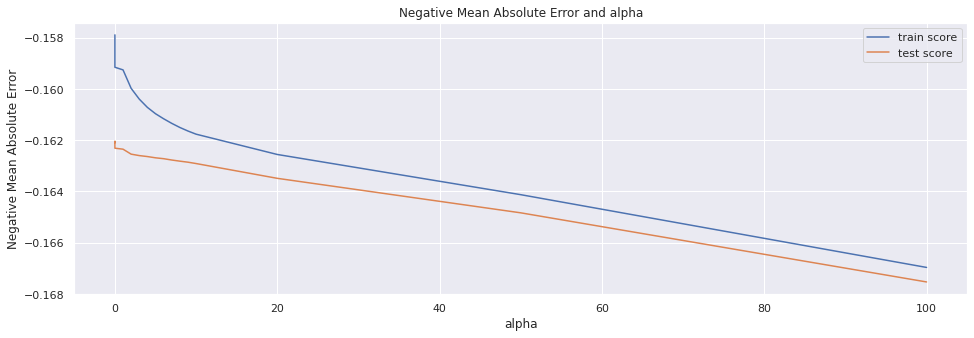

In [ ]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [ ]:
# ridge model
alpha = 1
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_new, y_train)
ridge.coef_

array([ 0.        ,  0.31050786, -0.06646002, -0.20522181, -0.24595235,
       -0.40133171,  0.17995666,  0.31752466,  0.34325779,  0.20834791,
       -0.19012614,  0.05216603, -0.47324658])

In [ ]:
#lets predict the R-squared value 
y_train_pred = ridge.predict(X_train_new)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.7206672290106404


In [ ]:
# Prediction on test set
X_test_new=X_test[col1]
X_test_new = sm.add_constant(X_test_new)
y_test_pred = ridge.predict(X_test_new)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.7036700552746421


In [ ]:
# Printing the RMSE value
mean_squared_error(y_test, y_test_pred)

0.04875816363584918

###Lasso Regression

In [ ]:
#lasso
params = {'alpha': [0.00005, 0.0001, 0.001, 0.008, 0.01]}
lasso = Lasso()

# cross validation
lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv.fit(X_train_new, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [5e-05, 0.0001, 0.001, 0.008, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [ ]:
cv_results_l = pd.DataFrame(lasso_cv.cv_results_)

In [ ]:
print(lasso_cv.best_params_)
print(lasso_cv.best_score_)

{'alpha': 5e-05}
-0.1621278180667019


In [ ]:
# lasso model
alpha = 0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 

Lasso(alpha=0.001)

In [ ]:
#Predict the R-squared value for Train data
y_train_pred = lasso.predict(X_train_new)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.7063055180824831


In [ ]:
#Predict the R-squared value for test data

y_test_pred = lasso.predict(X_test_new)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.7175095710492903


In [ ]:
mean_squared_error(y_test, y_test_pred)

0.046481008097597344

In [ ]:
print(list(zip(lasso.coef_, X_train_new)))

[(0.0, 'const'), (0.30747157978700784, 'OverallQual'), (-0.03933552381637284, 'MSZoning_FV'), (-0.2064735418188614, 'MSZoning_RM'), (-0.1771185258621216, 'Neighborhood_BrDale'), (-0.0, 'Condition2_PosN'), (0.0, 'RoofStyle_Shed'), (0.0902571510021051, 'Heating_GasA'), (0.06635851054276495, 'Heating_GasW'), (0.0, 'Heating_Wall'), (-0.0, 'Electrical_FuseP'), (-0.0, 'GarageQual_Po'), (-0.0, 'PoolQC_Gd')]


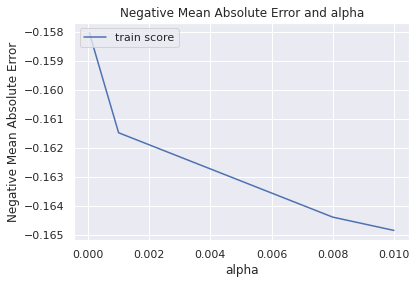

In [ ]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results_l['param_alpha'], cv_results_l['mean_train_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [ ]:
#Final Ridge model
ridge = Ridge(alpha = 20)
ridge.fit(X_train_new,y_train)

y_pred_train = ridge.predict(X_train_new)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test_new)
print(r2_score(y_test,y_pred_test))

0.7050216756867456
0.7160511667880806


In [ ]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [ ]:
ridge_coef.sort_values(by='Coef',ascending=False)

,Feaure,Coef
0,MSSubClass,11.987238
2,Street,0.303966
8,BsmtFinSF1,0.067928
9,BsmtFinSF2,0.046663
7,MasVnrArea,0.025112
10,BsmtUnfSF,0.000907
1,LotArea,0.000000
12,CentralAir,-0.011690
11,TotalBsmtSF,-0.031216
6,YearRemodAdd,-0.037032


In [ ]:
#Final Lasso model
lasso = Lasso(alpha=0.02)
lasso.fit(X_train_new,y_train)

y_train_pred = lasso.predict(X_train_new)
y_test_pred = lasso.predict(X_test_new)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.6781808385435362
0.6970438506986297


In [ ]:
print(list(zip(lasso.coef_, X_train_new)))

[(0.0, 'const'), (0.2968257245749022, 'OverallQual'), (-0.0, 'MSZoning_FV'), (-0.07602402023110919, 'MSZoning_RM'), (-0.0, 'Neighborhood_BrDale'), (-0.0, 'Condition2_PosN'), (0.0, 'RoofStyle_Shed'), (0.0, 'Heating_GasA'), (0.0, 'Heating_GasW'), (-0.0, 'Heating_Wall'), (-0.0, 'Electrical_FuseP'), (-0.0, 'GarageQual_Po'), (-0.0, 'PoolQC_Gd')]
